# Analyse exploratoire - Projets -  Idées innovantes d’applications en lien avec l'alimentation <br /> <font color='green'> -- Bonnes habitudes alimentaires  </font> 

## Résumé 

On veut savoir les aliments les plus adapté pour une personne que envisage d'acquérir des bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega 6, omega 9, du sel et sucre non nécessaire, vitamines, fibres, minéraux, protéines et calcium. Cela en évitant les additifs et on privilégient les aliments avec un nutriscore et ecoscore favorable.

## Bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pathlib import Path
import sklearn.metrics as metrics
from myfile import correl_pvalue, create_régression_linéaire,percentage_error,display_circles, \
                   display_scree_plot,scatter_plot_nutriscore,separete_liquid_solid,\
                   histograme_plot,boxplot_plot,plot_box_plot                  
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.cluster import KMeans
import matplotlib.colors as colors
#from matplotlib.colors import ListedColormap

import warnings
warnings.simplefilter(action='ignore', category=Warning)

sns.set()

## Données utilisées

In [2]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')

marche_FR =0
file1 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")

df_in =pd.read_csv(str(file1),  sep='\t', encoding='utf-8', low_memory=False)


In [3]:
df=pd.melt(frame=df_in, 
id_vars   =["nutriscore_grade",'product_name','categories','countries_en','ecoscore_grade_fr'] ,
value_vars=["sugars_100g","saturated-fat_100g",'energy_100g','sodium_100g','carbohydrates_100g','proteins_100g',
            'fiber_100g','additives_n','fat_100g','ecoscore_score_fr','nova_group'],
var_name  ="Food_composition", 
value_name="Quantities") 

In [4]:
if marche_FR == 1:
    region = 'FR_'
    df1=df[df['countries_en'].str.contains('France', na=True)]  
else:
    region = 'GLOBAL_'
    df1=df

## Analyse exploratoire 

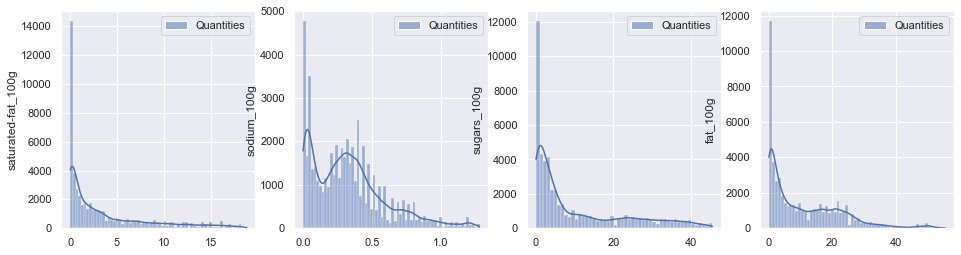

<Figure size 432x288 with 0 Axes>

In [5]:
varname='Food_composition'
tcolors="teal"

figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_1.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'saturated-fat_100g',axs[0],tcolors)
histograme_plot(df1, varname,'sodium_100g',axs[1],tcolors)
histograme_plot(df1, varname,'sugars_100g',axs[2],tcolors)
histograme_plot(df1, varname,'fat_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

La plupart des aliments ont moins de gras, du sel et du sucre

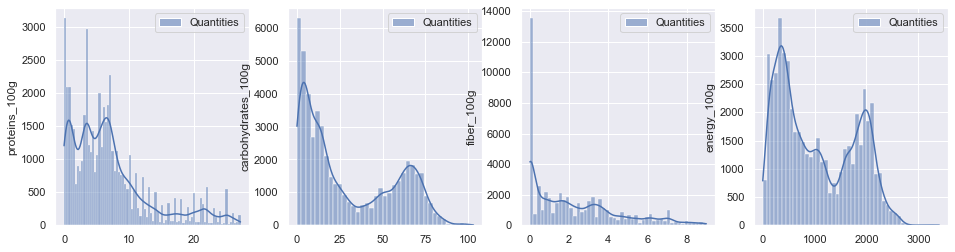

<Figure size 432x288 with 0 Axes>

In [6]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_2.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'proteins_100g',axs[0],tcolors)
histograme_plot(df1, varname,'carbohydrates_100g',axs[1],tcolors)
histograme_plot(df1, varname,'fiber_100g',axs[2],tcolors)
histograme_plot(df1, varname,'energy_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

La plupart des aliments sont riches en protéines, en carbohydrates, en fibre et sont plus  énergétiques.

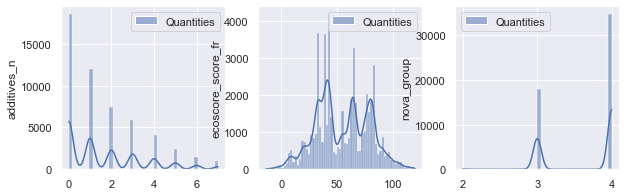

<Figure size 432x288 with 0 Axes>

In [7]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_3.jpeg'))
#
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
histograme_plot(df1, varname,'additives_n',axs[0],tcolors)
histograme_plot(df1, varname,'ecoscore_score_fr',axs[1],tcolors)
histograme_plot(df1, varname,'nova_group',axs[2],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


La plupart des aliments sont très transformé, ont plus d’additives. Le ecoscore est élevé en moyenne.

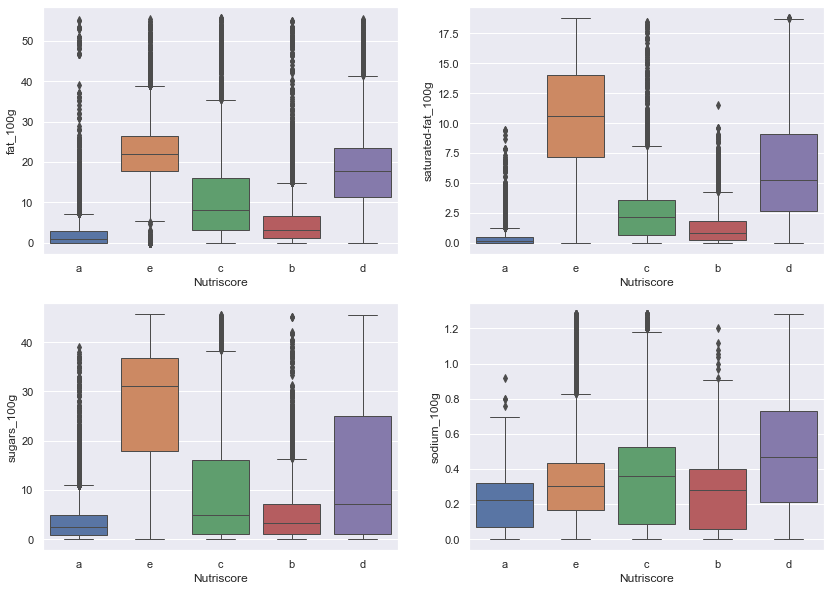

In [8]:
varname='Food_composition'
linewidthy=1
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_1.jpeg'))
# #
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','fat_100g',axs[0,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','saturated-fat_100g',axs[0,1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','sugars_100g',axs[1,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','sodium_100g',axs[1,1],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

Les produits avec nutriscore D et E sont souvent sucré, gras et surtout avec le gras saturée que peut contribuer à la production de mauvais cholestérol.  Les produits avec nutriscore C sont souvent plus sale que les produits avec nutriscore E. 

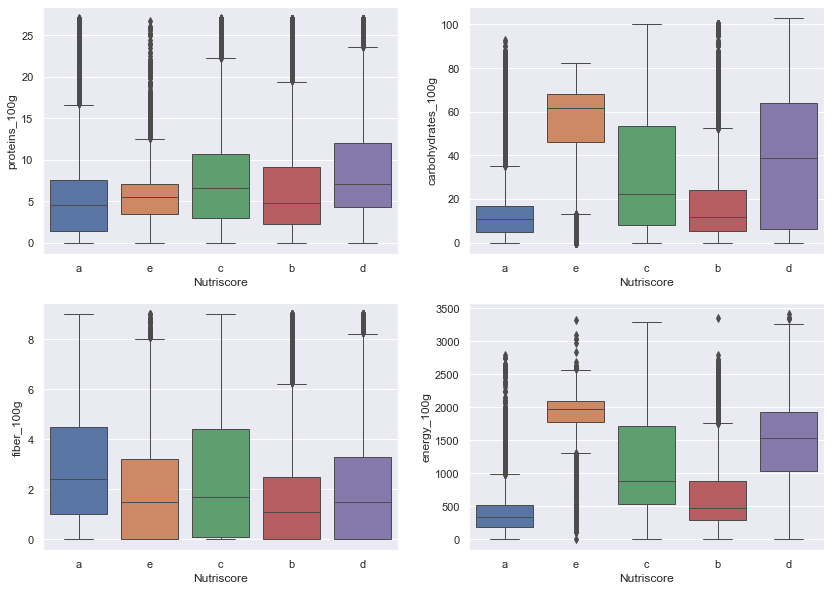

In [9]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_2.jpeg'))
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','proteins_100g',axs[0,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','carbohydrates_100g',axs[0,1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','fiber_100g',axs[1,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','energy_100g',axs[1,1],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

Les produits avec nutriscore A et B ont souvent moins de carbohydrates, fibre et sont moins énergétiques.

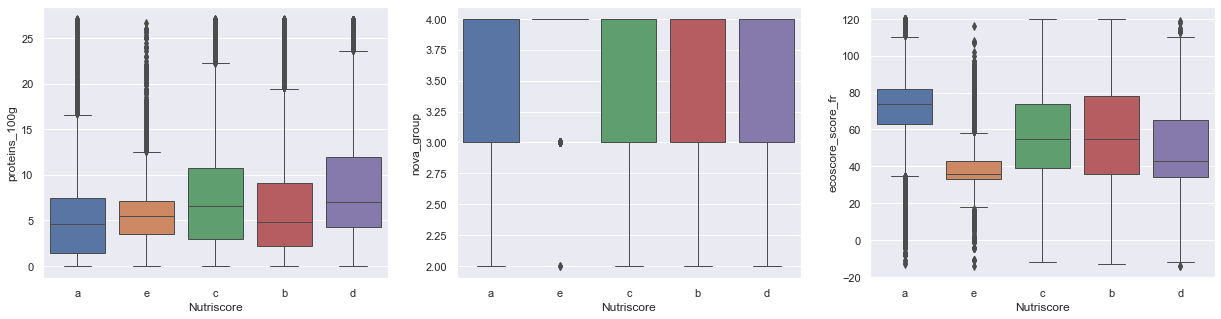

In [10]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_3.jpeg'))
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','proteins_100g',axs[0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','nova_group',axs[1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','ecoscore_score_fr',axs[2],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


Les produits avec nutriscore A et B ont souvent un meilleur ecoscore.

## Corrélation et causalité entre les variables

In [11]:
var_2_drop=["Unnamed: 0",'countries_en','ingredients_text']

df_projet = df_in.drop(var_2_drop, axis=1)        
data_corr = df_projet.drop(["nutriscore_grade",'ecoscore_grade_fr','categories','product_name'], axis=1)

[coef_correl,pvalue] = correl_pvalue(data_corr)

In [12]:
data_corr.head()

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n
0,-4.0,4.0,80.0,2.20,0.5,160.0,669.0,25.20,0.60,9.50,0.14,1.6,3.0
1,23.0,3.0,64.0,53.20,9.6,561.0,2318.0,11.70,0.50,8.20,1.08,1.3,0.0
2,3.0,4.0,79.0,1.18,0.0,365.0,1527.0,71.76,4.71,12.94,0.48,2.4,0.0
3,3.0,4.0,28.0,0.00,0.0,250.0,1046.0,95.00,0.00,0.00,0.00,0.0,2.0
4,1.0,4.0,64.0,6.60,1.7,162.0,678.0,17.00,3.70,8.20,0.29,0.9,2.0


In [13]:
pvalue.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))   # if pvalue > 0.05  --- 'Probably independent'   # else: 'Probably dependent'

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n
nutriscore_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8e-149,0.0,5.5e-107,0.0
nova_group,0.0,0.0,0.0,3.4e-12,4.3e-112,4.3e-128,7.4e-129,0.0,0.0,1.8e-125,0.04,2.4e-120,0.0
ecoscore_score_fr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5e-18,0.0,0.0,1.6e-139,2.1e-302,0.0
fat_100g,0.0,3.4e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7e-126
saturated-fat_100g,0.0,4.3e-112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8e-118,0.077,2.9e-314
energy-kcal_100g,0.0,4.3e-128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5e-286
energy_100g,0.0,7.4e-129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3e-284
carbohydrates_100g,0.0,0.0,2.5e-18,0.0,0.0,0.0,0.0,0.0,0.0,1e-78,0.091,0.0,0.0
sugars_100g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9e-138,0.0
proteins_100g,3.8e-149,1.8e-125,0.0,0.0,0.0,0.0,0.0,1e-78,0.0,0.0,0.0,1.1e-50,8.7e-107


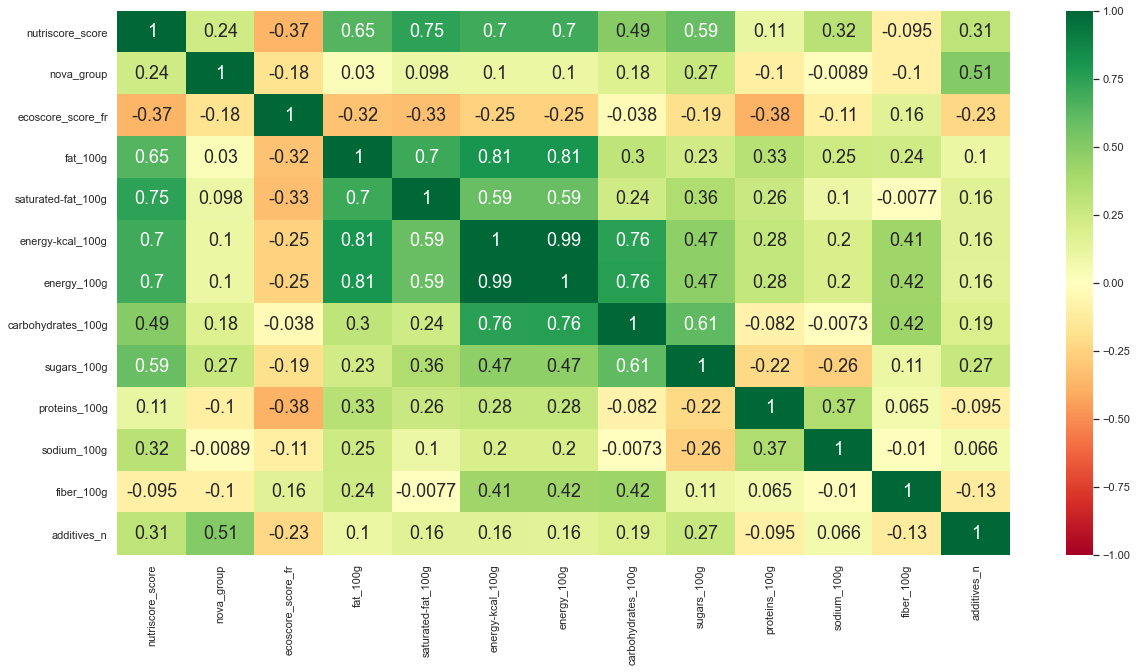

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(coef_correl, vmin=-1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()


Le nutriscore  est linéairement relationné avec le gras (saturé et total), l’énergie, le sucre et les carbohydrates. Donc on peut utiliser la régression linéaire, PCA or KMeans pour les analyse.

### Prédire le nutriscore en utilisant la régression linéaire  

In [15]:
features=list(df_projet.columns)
todelite=['categories','product_name','ecoscore_grade_fr','energy-kcal_100g','nutriscore_grade','nutriscore_score']

for i in range(len(todelite)):
    features.remove(todelite[i])
    
y=df_projet['nutriscore_score']
X=pd.DataFrame(np.c_[df_projet['nova_group'],df_projet['ecoscore_score_fr'],df_projet['fat_100g'],
                    df_projet['saturated-fat_100g'],df_projet['energy_100g'],df_projet['carbohydrates_100g'],
                    df_projet['sugars_100g'],df_projet['proteins_100g'],df_projet['sodium_100g'],df_projet['fiber_100g'],
                    df_projet['additives_n'],df_projet['product_name'],df_projet['nutriscore_grade'],df_projet['categories']])

tsize=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize)

X_train_all=copy.deepcopy(X_train)
X_test_all =copy.deepcopy(X_test)

y_teste=X_test.values[:,-3]
y_testc=X_test.values[:,-2]
y_testd=X_test.values[:,-1]
X_train=X_train.values[:,:-3]
X_test =X_test.values[:,:-3]
y_traine=X_train[:,-3].reshape(-1,1)
y_trainc=X_train[:,-2].reshape(-1,1)
y_traind=X_train[:,-1].reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

   

LinearRegression()

In [16]:
y_pred = regr.predict(X_test)
 
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_test-y_pred})

In [17]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2 = r2_score(y_test, y_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse)
print('Coefficient of determination:', test_set_r2)


root-mean-square error  2.8164204083349573
Coefficient of determination: 0.8945882120035938


In [18]:
Coef = pd.DataFrame(regr.coef_, index=features)
Coef=Coef.T
Coef

,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n
0,0.32,-0.02,0.04,0.71,3.40e-03,0.02,0.24,-0.18,10.92,-1.01,0.04


Les aliments à limiter sont ceux avec beaucoup d'énergie,gras, de gras saturé, du sucres, du sel (sodium), carbohydrates_100g, de additives et tres transformé (nova_group). Le gras saturé, sucre, sel, nova group contribuent fortement pour augmenter le nutriscore. 

Les aliments à favoriser sont ceux avec plus de fibres, protéines et avec un nutriscore favorable. 

#### Équation 

In [19]:
y_predit = regr.intercept_ + [np.sum(regr.coef_*X_test[i,:]) for i in range(len(X_test))]
error    = y_predit-y_pred
error

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        0.00000000e+00, -7.10542736e-15,  0.00000000e+00])

#### Données prédites vs normales

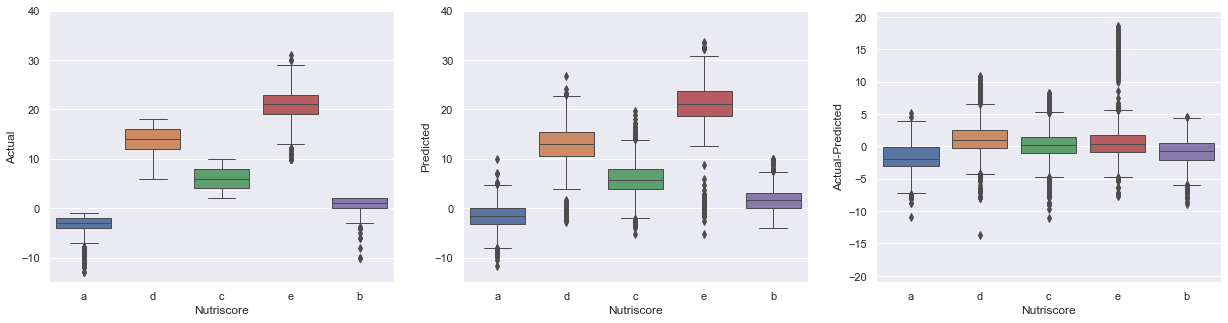

In [20]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression.jpeg'))
miny=-15
maxy=40
ds=21

fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_score,'','Nutriscore_grade','Actual','Actual',axs[0],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Predicted','Predicted',axs[1],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Actual-Predicted','Actual-Predicted',axs[2],linewidthy,"Nutriscore",-ds,ds,0)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [21]:
listS    =[-15,0,3,11,19]  # pour solide
listS_max=[-1,2,10,18,40]
listL    =[-1,1, 2,6,40]   # pour liquide
listL_max=[-1,1,5,9,40]

[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      9763         10778               9629         1.4              15879


In [22]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1929         1936               1692         12.3              15879


La regresion linear predit considerablement bien le nutriscore des 5 classe d'aliments

### Prédire le nutriscore en utilisant l'APC

In [23]:
from sklearn import decomposition
from sklearn import preprocessing 
n_comp=4

feat_cols = 'saturated-fat_100g','energy_100g','fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g','nova_group',\
            'ecoscore_score_fr','additives_n','fiber_100g'
x = df_projet.loc[:, feat_cols].values
y = df_projet['nutriscore_score']

names = df_projet.index
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


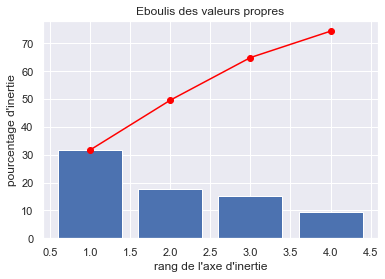

In [24]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('percentagen_explique.jpeg'))

display_scree_plot(pca)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

Les 2 première composante explique seulement 50% de la variance

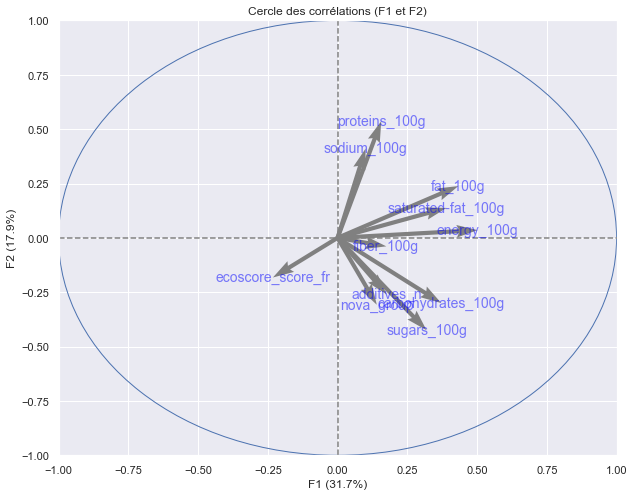

In [25]:
# Cercle des corrélations
pcs = pca.components_
figure_name =Path(str(dir_fig) +'/' + str(region) + str('cicle_correle.jpeg'))

display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(feat_cols))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

Le fat_100g,saturated_fat_100g, energy_100g, carbohydrates_100g sont qui sont mieux représentées sur l’axe F1 et sont fortement corrélées entre elles. Proteins_100g, sodium_100g sont mieux représentées sur F2. 

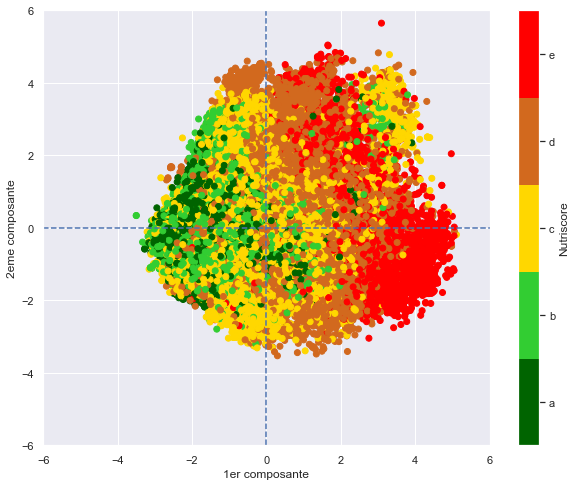

In [26]:
xlim1=[-6,6]
ylim1=[-6,6]
nutriscore=["a","b","c","d","e"]
cmapy = ListedColormap(['darkgreen','limegreen','gold','chocolate','red'])
bounds = [-15,-1,2,10,18,40]
normy = BoundaryNorm(bounds, cmapy.N)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('scatter_individue.jpeg'))

scatter_plot_nutriscore(x_pca[:,0],x_pca[:,1],y,cmapy,normy,xlim1,ylim1,'1er composante',
                        '2eme composante','Nutriscore',bounds,nutriscore)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

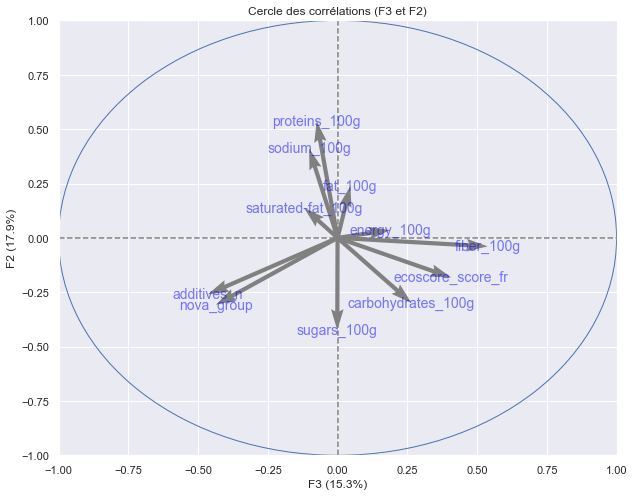

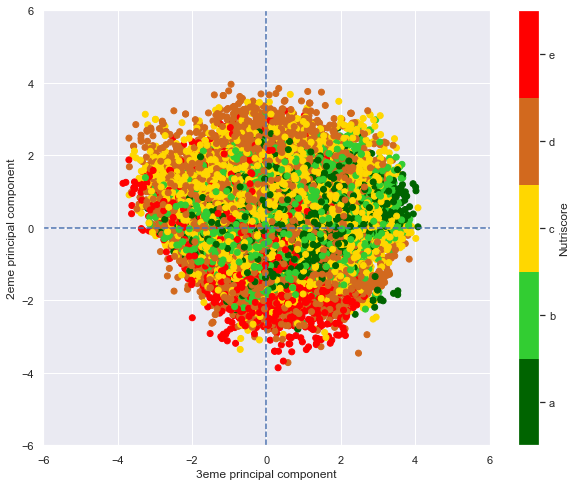

In [27]:
display_circles(pcs, n_comp, pca, [(2,1)], labels = np.array(feat_cols))


scatter_plot_nutriscore(x_pca[:,2],x_pca[:,3],y,cmapy,normy,xlim1,ylim1,'3eme principal component',
                        '2eme principal component','Nutriscore',bounds,nutriscore)


Text(84.5, 0.5, 'Composantes')

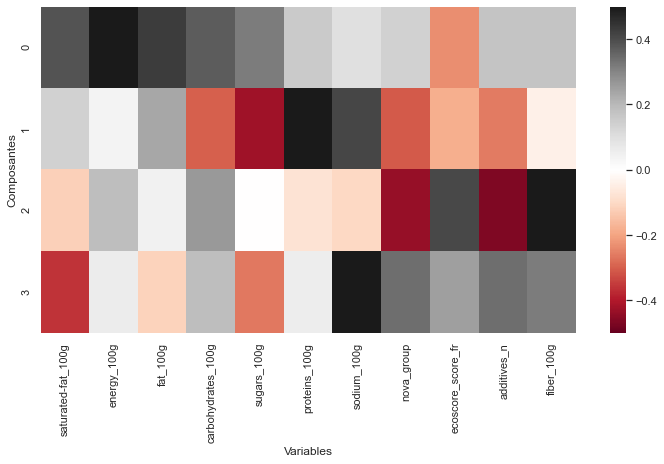

In [28]:
map= pd.DataFrame(pca.components_,columns=feat_cols)
plt.figure(figsize=(12,6))
ds=2
gfg=sns.heatmap(map,cmap='RdGy', vmin=-1/ds, vmax=1/ds)
plt.xlabel("Variables")
plt.ylabel("Composantes")

In [29]:
pca.explained_variance_ratio_

array([0.3172618 , 0.17859429, 0.15288764, 0.09473371])

In [30]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y, test_size=tsize)

regr_pca = linear_model.LinearRegression()
regr_pca.fit(X_pca_train, y_pca_train)
y_pca_pred = regr_pca.predict(X_pca_test)
 
df_pca_score = pd.DataFrame({'Actual': y_pca_test, 'Predicted': y_pca_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_pca_test-y_pca_pred})

In [31]:
print('Coefficients: \n', regr_pca.coef_)

test_set_rmse_pca = (np.sqrt(mean_squared_error(y_pca_test, y_pca_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2_pca = r2_score(y_pca_test, y_pca_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse_pca)
print('Coefficient of determination:', test_set_r2_pca)


Coefficients: 
 [ 3.69435806 -0.00521068 -1.48116072 -0.82291579]
root-mean-square error  4.730353342064993
Coefficient of determination: 0.7022404699620697


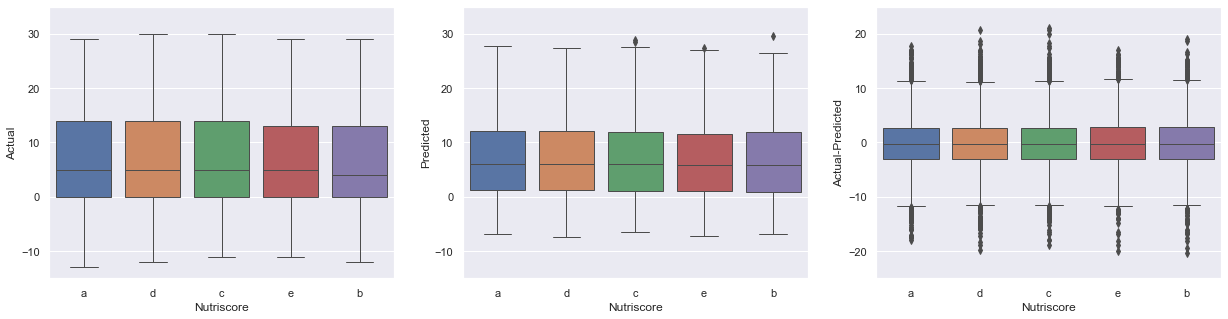

In [32]:
miny=-15
maxy=35
ds=25
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression_PCA.jpeg'))
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_pca_score,'','Nutriscore_grade','Actual','Actual',axs[0],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_pca_score,'','Nutriscore_grade','Predicted','Predicted',axs[1],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_pca_score,'','Nutriscore_grade','Actual-Predicted','Actual-Predicted',axs[2],linewidthy,"Nutriscore",-ds,ds,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [33]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      9806         10869               9204         6.1              15879


In [34]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1934         1352               1109         42.7              15879


Equation

In [35]:
y_pca_predit = regr_pca.intercept_ + [np.sum(regr_pca.coef_*X_pca_test[i,:]) for i in range(len(X_pca_test))]
error    = y_pca_predit-y_pca_pred

En utilisant régression seule or avec pca, le pourcentage d'erreur est le même. Le problème peut venir du fait que les  aliments liquide et solide ne sont pas classifié de la même façon dans la séparation des nutriscore 

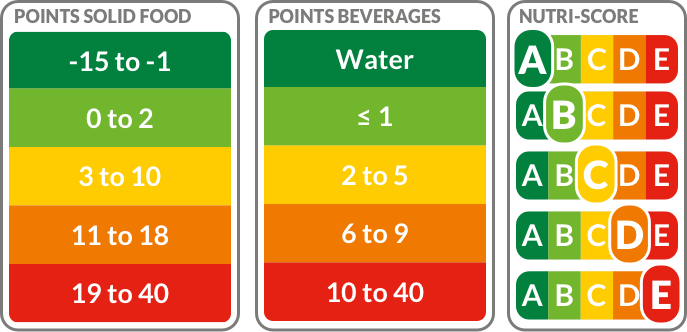

In [36]:
Image(filename = str(dir_fig) + "/"+ str("nutriscore-table-en@1_5x.png"), width=500, height=500)


### Separation des produits en 2 categories: liquides et solides

In [37]:
da=1
dss=0
[liquid, solid] = separete_liquid_solid(df_score,da,dss)
[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                                listL_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                      listL_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      1204         1387               1200         0.3              1849
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      605         462               454         25.0              1849


In [38]:

[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                                listS_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                      listS_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      11750         12115               11629         1.0              13979
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1868         1864               1641         12.2              13979


Le pourcentage ne s'améliore pas même après la séparation des solide et liquide dans les produits Français

### Classification K-means 

In [ ]:
sum_of_squared_distances = []
si_coef = []
K = range(1,11)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(x)
    sum_of_squared_distances.append(k_means.inertia_)
    labels_k = k_means.labels_
    if k>1:
        si_coef.append(metrics.silhouette_score(x, labels_k, metric = 'euclidean'))

In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_distance_all.jpeg'))
plt.figure(figsize=(10,5))
sns.lineplot(K, sum_of_squared_distances,marker='o',color='blue')
plt.title('Méthode du coude pour un k optimal')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Somme des carrés des distances (WCSS)')

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [ ]:
# Nous pouvons vérifier cela en calculant le coefficient de silhouette pour k=5
print('Silhouette_score est:      ',  [round(si_coef[t],3) for t in range(0,len(si_coef)) ])
coef_variation = ([round(si_coef[t]- si_coef[t-1],3) for t in range(0,len(si_coef)) ]) 
print('Delta silhouette_score est:', coef_variation)


Nous pouvons voir que la baisse de la somme des carrés des distances commence à ralentir fortement après k=4. Par conséquent, 5 est le nombre optimal de clusters pour notre analyse.

In [ ]:
kp=5
k_means = KMeans(n_clusters=kp).fit(x)
labels  =k_means.labels_
centers=k_means.cluster_centers_

In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_train_test_separe.jpeg'))
colors_clusters=ListedColormap(['blue','orange','green','red','purple'])
fig= plt.figure(figsize=(16,8)) 
plt.scatter(x[:, 0],x[:, 1], c=labels.astype(float),s=25, cmap=colors_clusters)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200,label = 'Centroids')
plt.xlabel(feat_cols[0])
plt.ylabel(feat_cols[1])
plt.legend()

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [ ]:
df_projet_clusters= copy.deepcopy(df_projet)
df_projet_clusters=df_projet_clusters.drop(['categories','ecoscore_grade_fr','product_name'], axis=1)
df_projet_clusters['Clusters'] = pd.Series(labels, index=df_projet_clusters.index)

In [ ]:
df_projet_clusters.head()

In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_sat_energy.jpeg'))

fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','nutriscore_score','nutriscore_score',axs[0],linewidthy,"Clusters",-20,35,0)
boxplot_plot(df_projet_clusters,'','Clusters','saturated-fat_100g','saturated-fat_100g',axs[1],linewidthy,"Clusters",-1,20,0)
boxplot_plot(df_projet_clusters,'','Clusters','energy_100g','energy_100g',axs[2],linewidthy,"Clusters",-100,3500,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_sugar_carbo.jpeg'))

fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','sugars_100g','sugars_100g',axs[0],linewidthy,"Clusters",-2,50,0)
boxplot_plot(df_projet_clusters,'','Clusters','carbohydrates_100g','carbohydrates_100g',axs[1],linewidthy,"Clusters",-5,110,0)
boxplot_plot(df_projet_clusters,'','Clusters','fat_100g','fat_100g',axs[2],linewidthy,"Clusters",-1,60,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [ ]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_add_eco.jpeg'))

fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','sodium_100g','sodium_100g',axs[0],linewidthy,"Clusters",-0.1,1.4,0)
boxplot_plot(df_projet_clusters,'','Clusters','additives_n','additives_n',axs[1],linewidthy,"Clusters",-.5,8,0)
boxplot_plot(df_projet_clusters,'','Clusters','ecoscore_score_fr','ecoscore_score_fr',axs[2],linewidthy,"Clusters",-20,130,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


##### Rechercher des aliments sains

In [ ]:
score_distribution= df_projet_clusters.groupby(['Clusters']).count()
score_distribution.drop(score_distribution.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)
score_distribution = score_distribution.rename({'nutriscore_grade':"Nombre de données par clusters"}, axis=1)

In [ ]:
score_distribution.head()

In [ ]:
df_to_norm=df_projet_clusters.drop(['nutriscore_grade'],axis=1)
Indicator=((df_to_norm-df_to_norm.min())/(df_to_norm.max()-df_to_norm.min()))
Indicator["Clusters"]=df_to_norm["Clusters"]
Indicator= Indicator.groupby(['Clusters']).sum()
Indicator= Indicator.prod(axis=1)
Indicator

In [ ]:
score_distribution['Indicator'] = Indicator
score_distribution=score_distribution.sort_values(by='Indicator', ascending=True)
score_distribution

In [ ]:
Good_prod=score_distribution[score_distribution['Indicator']==Indicator.min()]

In [ ]:
print(Good_prod)  

In [ ]:
colors=['darkgreen','limegreen','gold','chocolate','red']
score_distribution.plot.pie(y='Nombre de données par clusters',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_clusters.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

In [ ]:
score_distribution=score_distribution.reset_index()
BON_ALIM=df_projet_clusters[df_projet_clusters['Clusters']==score_distribution['Clusters'][0]] 
BON_ALIM_count= BON_ALIM.groupby(['nutriscore_grade']).count()
BON_ALIM_count.drop(BON_ALIM_count.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)

BON_ALIM_count = BON_ALIM_count.rename({'Clusters':"nutriscore_grade dans le cluster de bon produits"}, axis=1)
BON_ALIM_count.plot.pie(y='nutriscore_grade in cluster of best product',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_cluster_1.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

In [ ]:
BON_ALIM_count

In [ ]:
BON_ALIM['product_name']=df_projet['product_name']
BON_ALIM.drop(BON_ALIM.columns.difference(['product_name','nutriscore_grade']), 1, inplace=True)
BON_ALIM.groupby(['nutriscore_grade']) 

In [ ]:
nutriscore=BON_ALIM['nutriscore_grade'].unique()

dff=[]
for kx in range(0,len(nutriscore)):
    gp=str(nutriscore[kx])
    dataa=BON_ALIM[BON_ALIM['nutriscore_grade']==str(gp)]
    product=dataa['product_name']
    data={gp:product}
    if gp=='a':
        df_final =pd.DataFrame(data,columns=list(gp))
    else:
        s1 = pd.DataFrame(data,columns=list(gp))
        s1.reset_index(drop=True, inplace=True)
        df_final.reset_index(drop=True, inplace=True)
        df_final=pd.concat([df_final, s1], axis=1, ignore_index=False)
    

In [ ]:
df_final.head()

## Conclusion 

- Pour adopter des bonnes habitudes alimentaires il faut privilégier les aliments avec: 
  - Plus de fibre, proteines 
  - Moins de gras, sucre, sel, carbohydrates, des additives et moins transformé 
  
 
- L'analyse en composantes principales ne semble pas tout à fait convenir pour analyse exploratoire dans ce projet.
- KMeans avec or pas les données d'entraînement et de test séparées  or pas montrent les même résultats.
